In [5]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

teta = 1
betta = 0.95
n = 100

In [6]:
x_n = sps.uniform(loc = teta, scale = teta).rvs(size=n)
x_n

array([1.16233665, 1.08413445, 1.88074858, 1.92802188, 1.73157933,
       1.97334024, 1.74605866, 1.93463206, 1.73480443, 1.0522601 ,
       1.15408966, 1.81407972, 1.24407614, 1.6120452 , 1.62659277,
       1.19207788, 1.28383573, 1.33200896, 1.60966393, 1.91165443,
       1.82263241, 1.30627657, 1.55681101, 1.92972413, 1.97956264,
       1.44744701, 1.66813163, 1.94154605, 1.6223469 , 1.44946946,
       1.20252694, 1.79852249, 1.7294589 , 1.56929922, 1.27136016,
       1.32395338, 1.46503644, 1.44558819, 1.64172265, 1.1440398 ,
       1.37222658, 1.6245731 , 1.85982358, 1.99802198, 1.66646608,
       1.55901863, 1.90978848, 1.32457591, 1.03851932, 1.28159685,
       1.04118567, 1.91036967, 1.36651339, 1.55285984, 1.99580458,
       1.25419094, 1.23602443, 1.38339946, 1.54084004, 1.27803111,
       1.54286563, 1.9355532 , 1.80809239, 1.21883776, 1.66059007,
       1.39355701, 1.34248929, 1.06000496, 1.26709814, 1.31197807,
       1.96683859, 1.96063062, 1.15196592, 1.94577687, 1.32641

In [7]:
# Точный доверительный интервал

t1 = ((1 - betta) / 2) ** (1 / n)
t2 = ((1 + betta) / 2) ** (1 / n)
x_max = np.max(x_n)

board1_acc = x_max / (t2 + 1) 
board2_acc = x_max / (t1 + 1)
l = board2_acc - board1_acc
print(f"Доверительный интервал: ({board1_acc};{board2_acc})")
print(f"Длина доверительного интервала {l}")

Доверительный интервал: (0.9991374552848022;1.0174350578311488)
Длина доверительного интервала 0.018297602546346603


In [8]:
# Асимптотический доверительный интервал (через метод моментов)

teta_omm = 2/3 * np.mean(x_n)
t1 = sps.norm(loc = 0, scale = 1).ppf((1-betta)/2)
t2 = sps.norm(loc = 0, scale = 1).ppf((1+betta)/2)
alpha1 = np.mean(x_n)
alpha2 = np.mean(x_n**2)

board1_mm = teta_omm - 2/3 * (alpha2 - alpha1**2)**0.5 * t2 / n**0.5
board2_mm = teta_omm - 2/3 * (alpha2 - alpha1**2)**0.5 * t1 / n**0.5
l = board2_mm - board1_mm
print(f"Доверительный интервал: ({ board1_mm}; {board2_mm})")
print(f"Длина доверительного интервала {l} ")

Доверительный интервал: (0.9756640089120073; 1.0531148742827234)
Длина доверительного интервала 0.0774508653707161 


In [9]:
# Бутстраповский параметрический доверительный интервал (используется ОММ)

def get_bootstrap(x, n_sample):
    sample = np.random.choice(x, size = (x.size, n_sample), replace = True)
    return sample

N = 50000
x_boot = get_bootstrap(x_n, N)
x_boot_omm = np.sort(2/3 * np.mean(x_boot, axis = 0)) # вариац ряд
k1 = int((1 - betta) * N / 2)
k2 = int((1 + betta) * N / 2)

board1_boot = x_boot_omm[k1]
board2_boot = x_boot_omm[k2]
l = board2_boot - board1_boot
print(f"Доверительный интервал: ({board1_boot}; {board2_boot})")
print(f"Длина доверительного интервала {l}")

Доверительный интервал: (0.975707616193672; 1.0532950124226526)
Длина доверительного интервала 0.07758739622898059


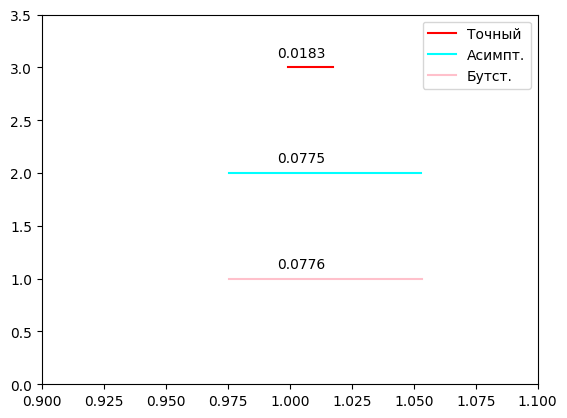

In [15]:
# Сравнение доверительных интервалов

plt.xlim(teta*0.9, teta*1.1)
plt.ylim(0, 3.5)

plt.text(teta - 0.005, 3.1, round(board2_acc - board1_acc, 4))
plt.plot([board1_acc, board2_acc], [3,3], color='red', label = "Точный")

plt.text(teta - 0.005, 2.1, round(board2_mm - board1_mm, 4))
plt.plot([board1_mm, board2_mm], [2,2], color='aqua', label = "Асимпт.")

plt.text(teta - 0.005, 1.1, round(board2_boot - board1_boot, 4))
plt.plot([board1_boot, board2_boot], [1,1], color='pink', label = "Бутст.")
plt.legend()